In [1]:
!pip install tensorflow==2.12.0

INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 54.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 71.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 96.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 MB 3.5 MB/s eta 0:00:00:00:01m00:01
  Attempting uninstall: wrapt
    Found 

1/1 [==============================] - 1s 1s/step


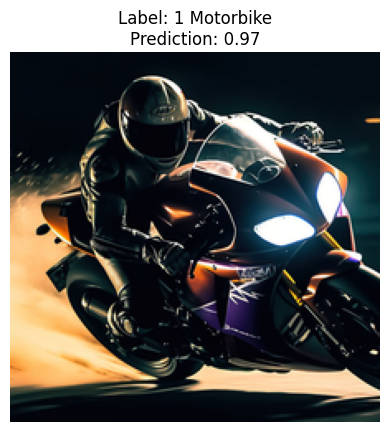

In [11]:
from keras.models import load_model  # TensorFlow is required for Keras to work
from PIL import Image, ImageOps  # Install pillow instead of PIL
import numpy as np
import matplotlib.pyplot as plt  # For displaying the image

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = load_model("/kaggle/input/mooodeltest/keras_model.h5", compile=False)

# Load the labels
class_names = open("/kaggle/input/mooodeltest/labels.txt", "r").readlines()

# Create the array of the right shape to feed into the keras model
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

# Replace this with the path to your image
image = Image.open("/kaggle/input/test-example/motor1.jpg").convert("RGB")

# Resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)

# Turn the image into a numpy array
image_array = np.asarray(image)

# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

# Load the image into the array
data[0] = normalized_image_array

# Predict using the model
prediction = model.predict(data)
index = np.argmax(prediction)
class_name = class_names[index].strip()  # Remove any extra whitespace or newlines
confidence_score = prediction[0][index]

# Print prediction and confidence score
#print("Class:", class_name)
#print("Confidence Score:", confidence_score)

# Display the image along with the prediction
plt.imshow(image)
plt.title(f"Label: {class_name}\nPrediction: {confidence_score:.2f}")
plt.axis("off")  # Hide axes for better visualization
plt.show()